In [82]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from collections import Counter

In [42]:
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [43]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [44]:
print(X.head())
print(y.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
dtype: float64


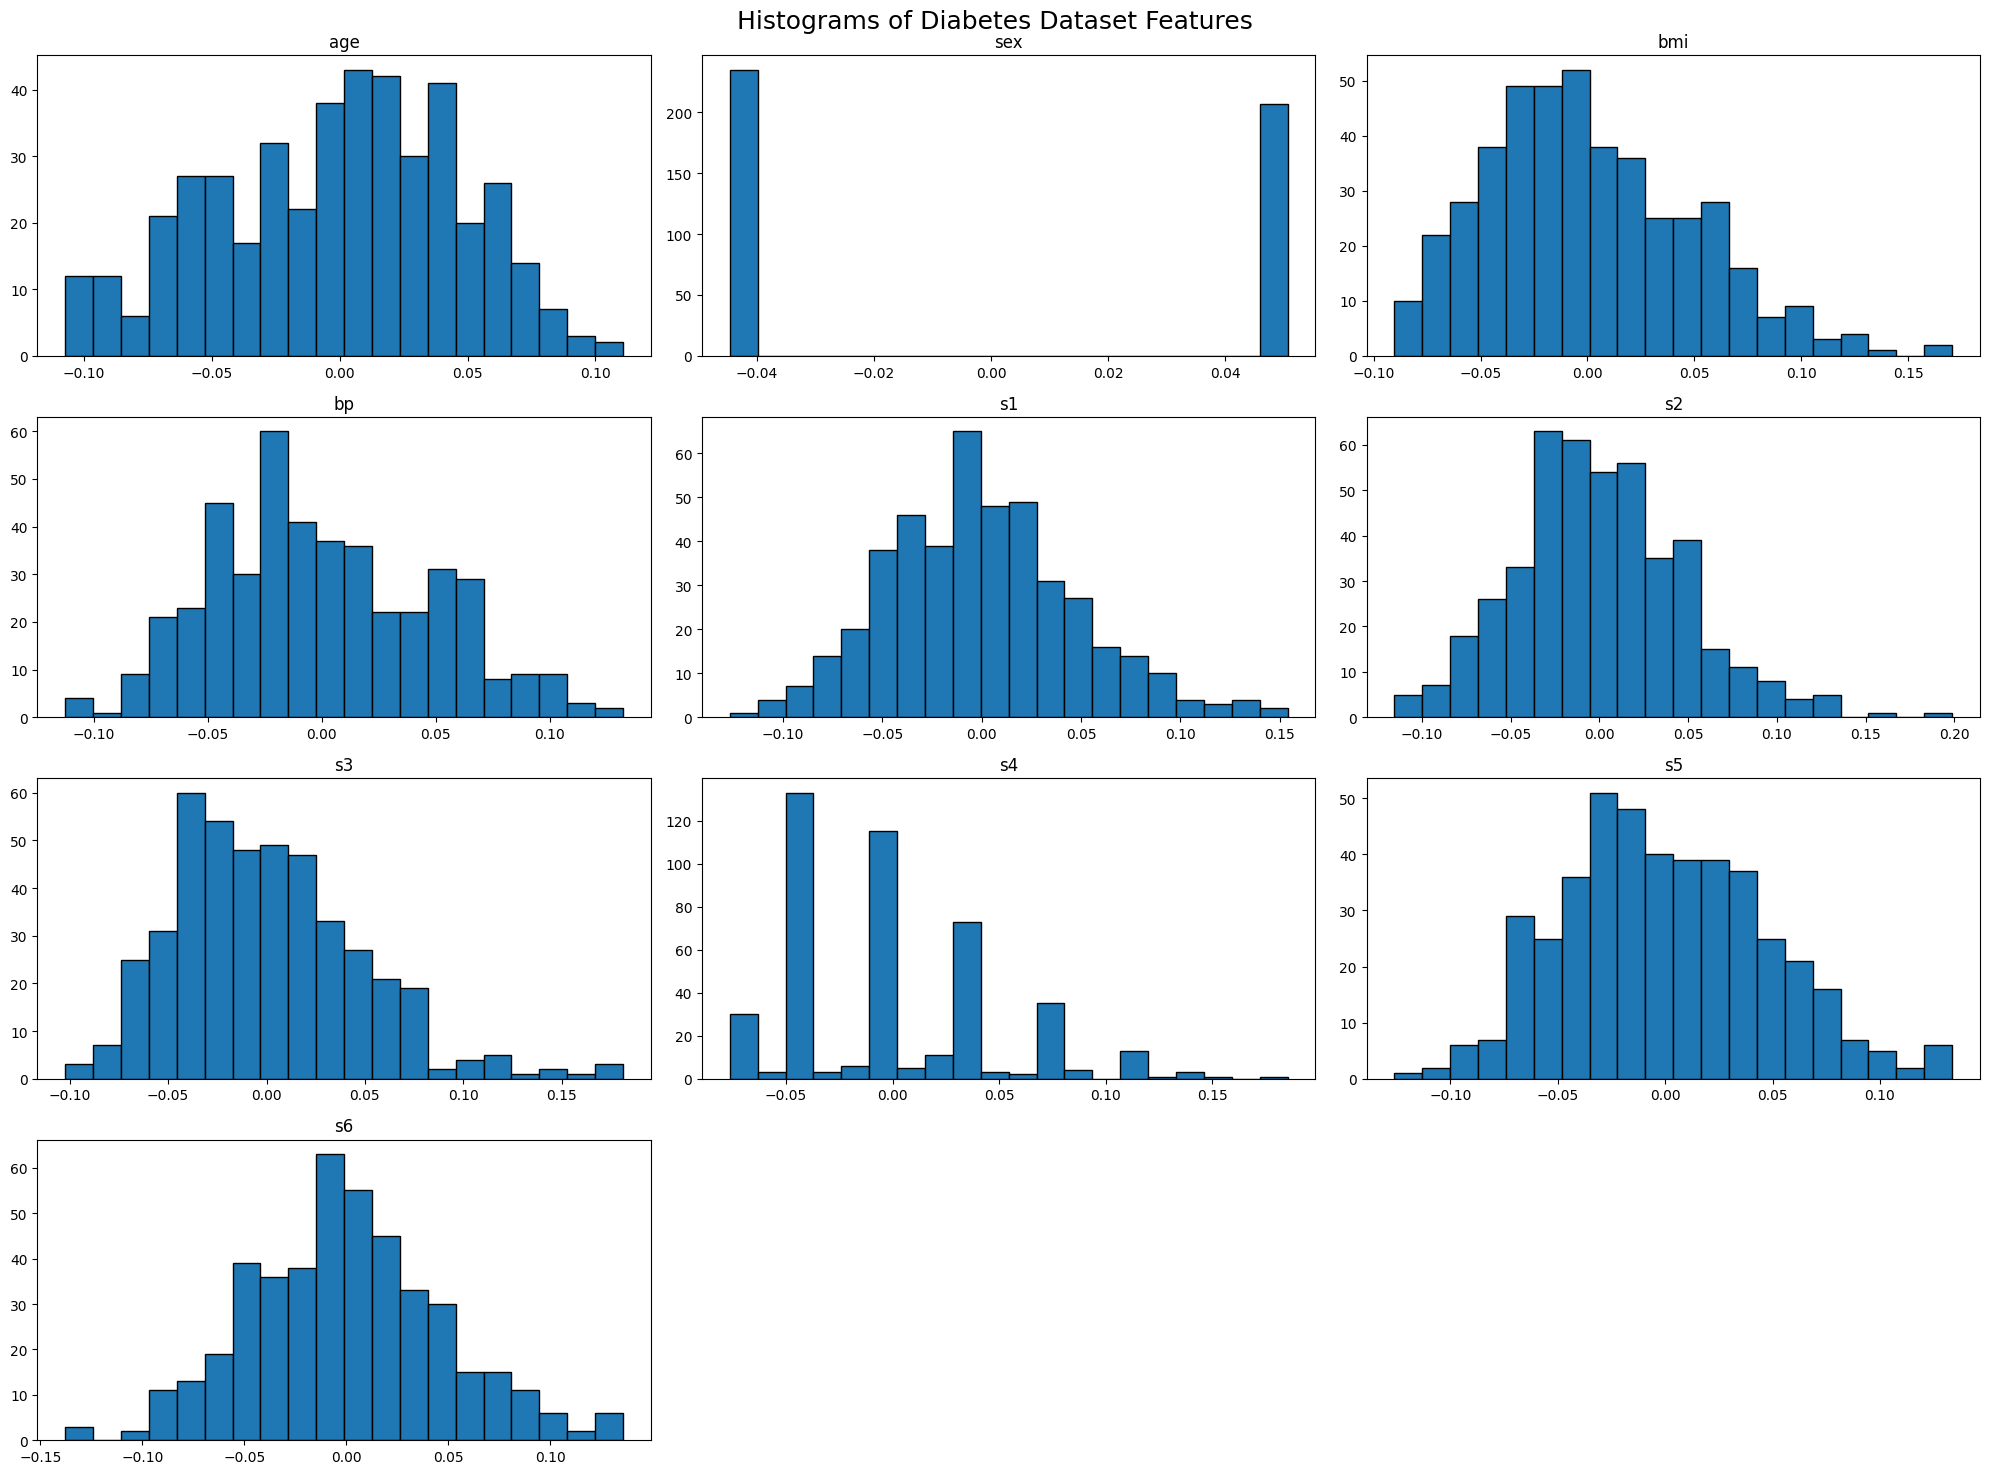

In [45]:
X.hist(bins=20, figsize=(20, 15), edgecolor='black', grid=False)
plt.suptitle("Histograms of Diabetes Dataset Features", fontsize=18)
plt.tight_layout()
plt.show()

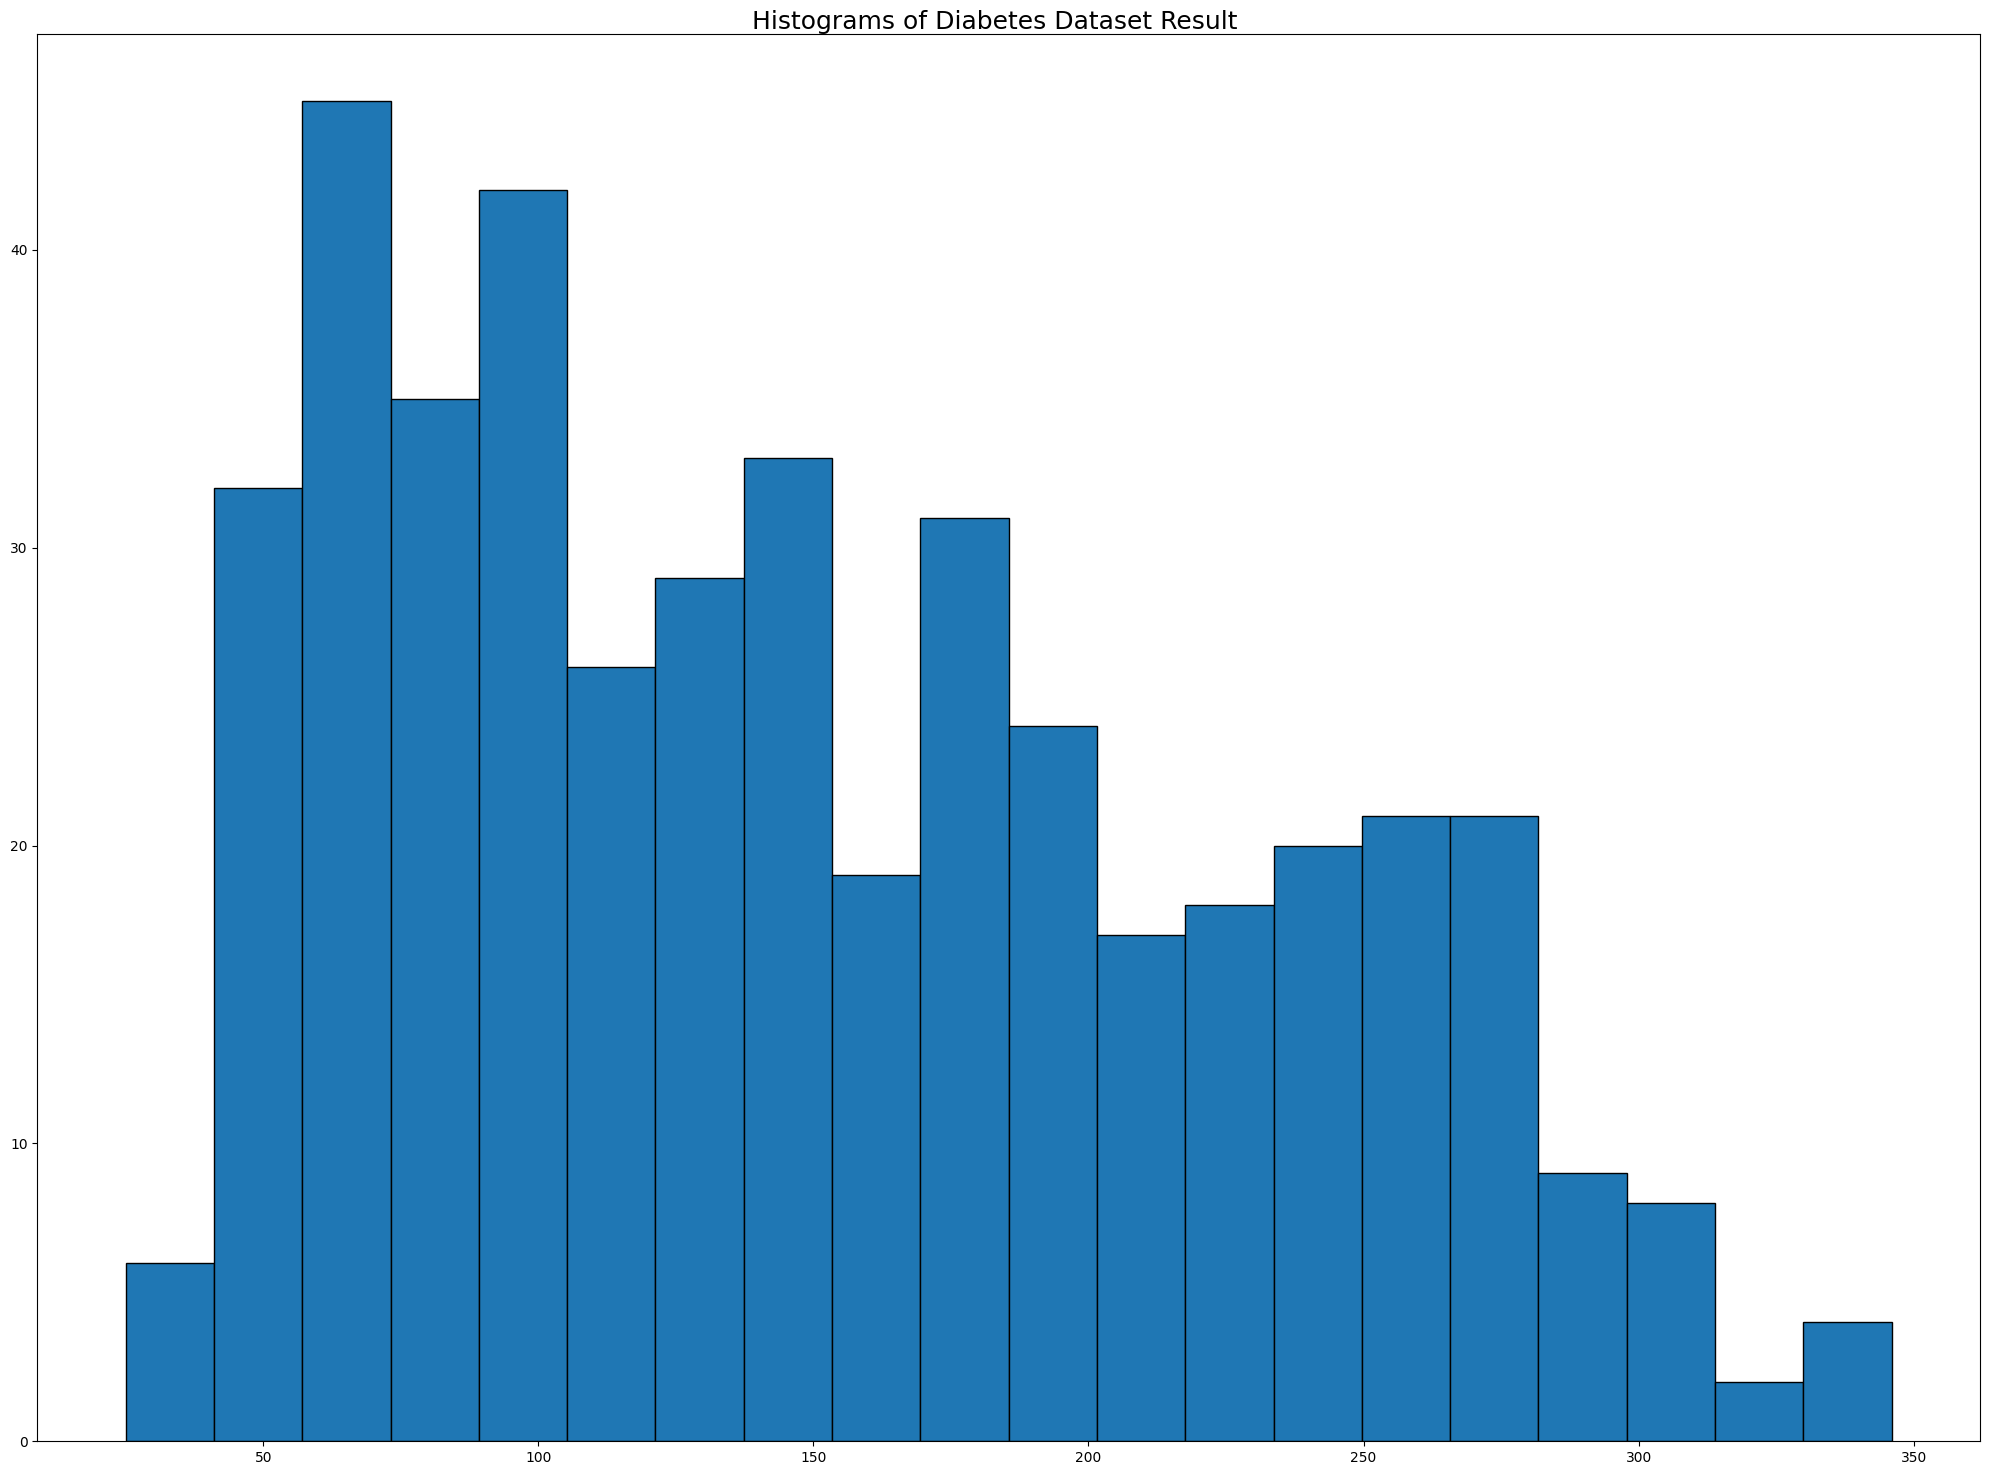

In [46]:
y.hist(bins=20, figsize=(20, 15), edgecolor='black', grid=False)
plt.suptitle("Histograms of Diabetes Dataset Result", fontsize=18)
plt.tight_layout()
plt.show()

In [47]:
X = np.array(X)
print(X)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


In [48]:
y = np.array(y)
print(y)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [49]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [50]:
def knn_regression(X_train, y_train, x_test, k=3):
    predictions = []
    for point in x_test:
        distances = []
        for train_point, label in zip(X_train, y_train):
            distance = euclidean_distance(point, train_point)
            distances.append((distance, label))
            distances.sort(key=lambda x: x[0])
        k_nearest_labels = [label for _, label in distances[:k]]
        prediction = np.mean(k_nearest_labels)
        predictions.append(float(prediction))
    return predictions

In [54]:
def MSE(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def MAE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size =0.2)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

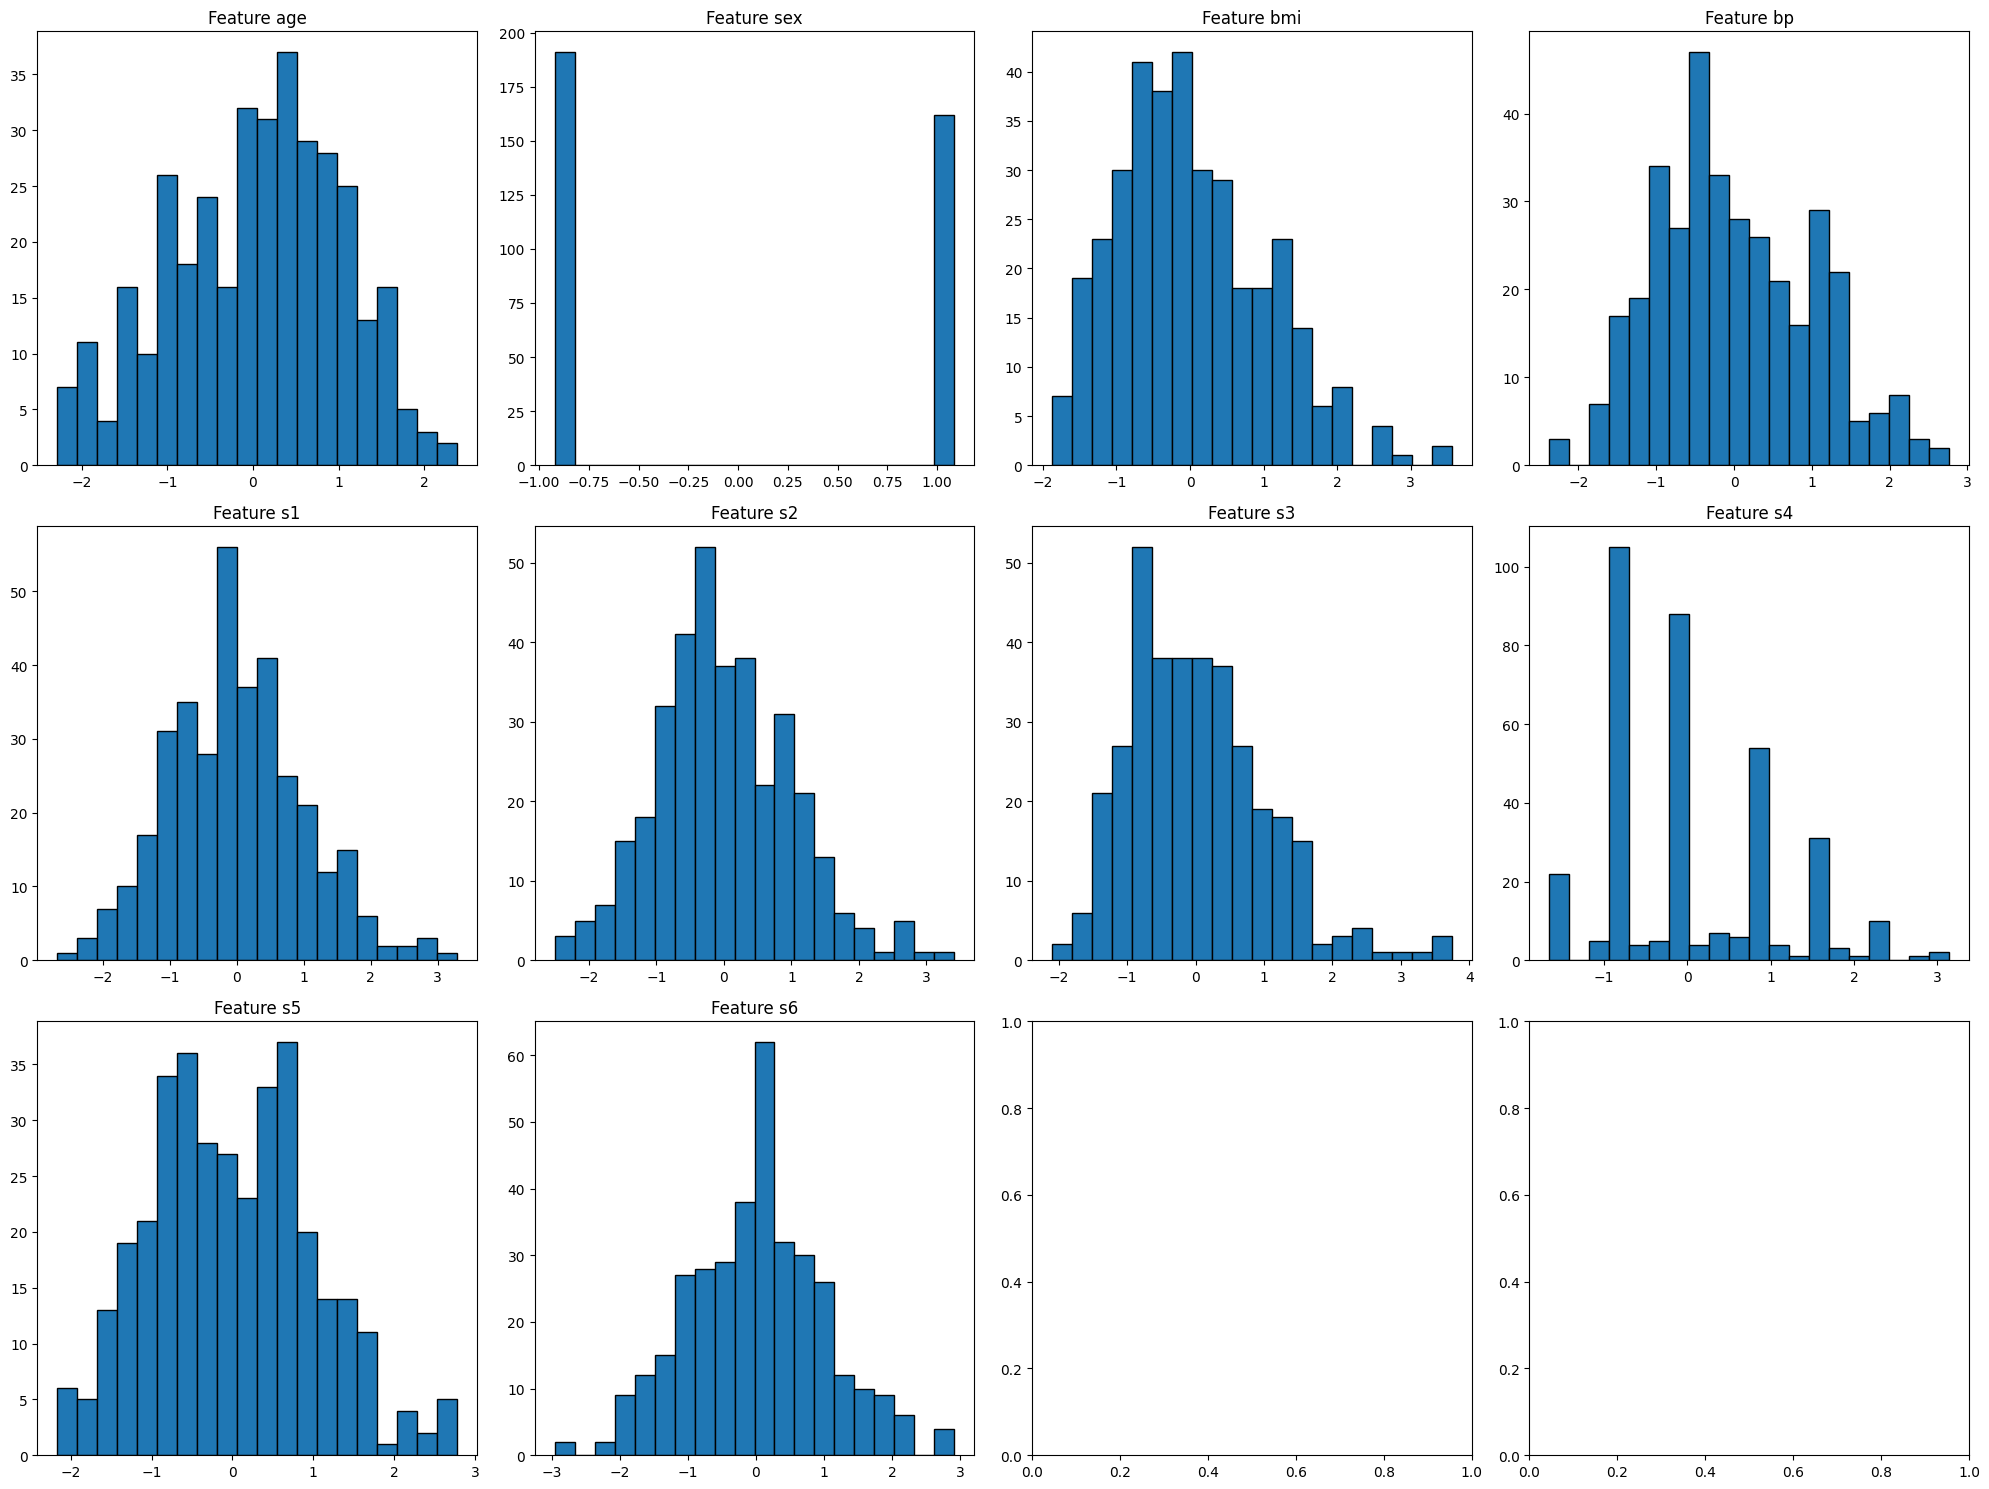

In [72]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
axs = axs.ravel()

for i in range(X_train.shape[1]):
    axs[i].hist(X_train[:, i], bins=20, edgecolor='black')
    axs[i].set_title(f"Feature {data.feature_names[i]}")

plt.tight_layout()
plt.show()

In [75]:
mses = {}
for k in range(1,5):
    y_predict = knn_regression(X_train , y_train , X_test , k=k)
    mse = MSE(y_test, y_predict)
    mae = MAE(y_test, y_predict)
    mses[k] = mse

In [86]:
mse_sklearn = {}
for k in range(1,5):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    mse = MSE(y_test, y_predict)
    mse_sklearn[k] = mse


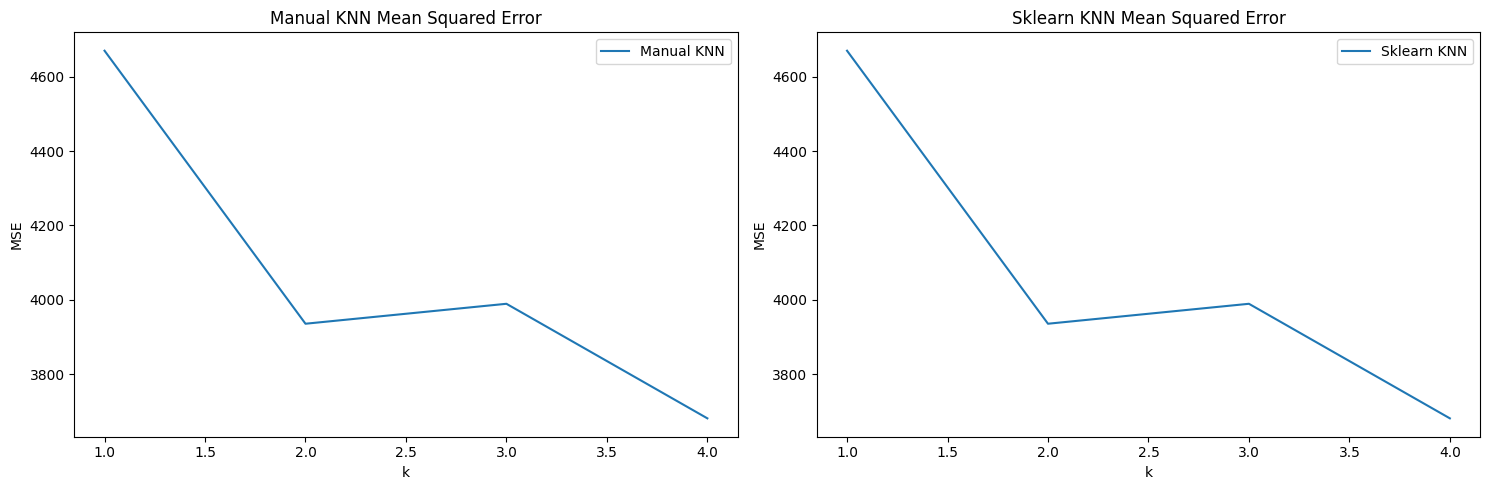

In [92]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(mses.keys(), mses.values(), label='Manual KNN')
ax[0].set_title('Manual KNN Mean Squared Error')
ax[0].set_xlabel('k')
ax[0].set_ylabel('MSE')
ax[0].legend()

ax[1].plot(mse_sklearn.keys(), mse_sklearn.values(), label='Sklearn KNN')
ax[1].set_title('Sklearn KNN Mean Squared Error')
ax[1].set_xlabel('k')
ax[1].set_ylabel('MSE')
ax[1].legend()

plt.tight_layout()
plt.show()